1. Tytuł raportu
2. Wstęp - motywacja, cele
3. Opis danych - pochodzenie, struktura zbioru(-ów), opis zmiennych
4. Opis procesu (poszczególnych kroków) przygotowywania danych do analizy i modelowania
5. Analiza danych - przyjęte założenia, krótki opis metod i obranej metodologii analizy
6. Modelowanie danych - przyjęte założenia, krótki opis metod i obranej metodologii budowania modeli
7. Rezultaty, wnioski i ich dyskusja


 # Analiza danych o wskaźnikach samobójstw w USA w podziale na płeć, rasę i grupy wiekowe (1950-2018)

# Wstęp

Samobójstwa są istotnym problemem zdrowia publicznego, wpływającym na miliony ludzi na całym świecie. Celem niniejszego raportu jest analiza długoterminowych trendów w zakresie wskaźników samobójstw w Stanach Zjednoczonych, z uwzględnieniem podziału na różne grupy wiekowe oraz płeć. Motywacją do przeprowadzenia tej analizy jest lepsze zrozumienie czynników wpływających na ryzyko samobójstwa oraz identyfikacja grup podwyższonego ryzyka, co może wspomóc tworzenie skuteczniejszych polityk prewencyjnych.

**Cele analizy:**

Zbadanie długoterminowych trendów wskaźników samobójstw w latach 2019-2026.

Analiza różnic w wskaźnikach samobójstw w zależności od płci, rasy oraz grupy wiekowej.


# Opis danych

**Pochodzenie danych**

Dane pochodzą z Krajowego Systemu Statystyki Żywotności (National Vital Statistics System - NVSS) oraz z Biura Spisu Ludności Stanów Zjednoczonych (U.S. Census Bureau).

**Źródła danych:**

Grove RD, Hetzel AM. "Vital statistics rates in the United States, 1940-1960."

NVSS annual public-use Mortality Files

Murphy SL, Xu JQ, Kochanek KD, Arias E, Tejada-Vera B. "Deaths: Final data for 2018."

Kaggle.com

**Struktura zbioru danych**

| **Kolumna**       | **Typ danych** | **Unikalne wartości / Zakres**                                       | **Opis**                                                                                           | **Procent wartości**              |
|--------------------|----------------|------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------|-----------------------------------|
| `INDICATOR`        | String         | 1 unikalna wartość: "Death rates for suicide"                          | Wskaźnik dotyczący śmiertelności samobójstw                                                       | 100%                              |
| `UNIT`             | String         | 2 wartości: "Deaths per 100,000 resident population, crude", "Deaths per 100,000 resident population, age-adjusted" | Typ jednostki miary                                                                                | 87% / 13%                         |
| `UNIT_NUM`          | Integer        | Wartości: 1 lub 2                                                      | Odpowiada jednostce z kolumny `UNIT`                                                              | 87% / 13%                         |
| `STUB_NAME`        | String         | "Sex, age and race", "Sex, age and race and Hispanic origin", Inne      | Kategoria obejmująca płeć, wiek, rasę i pochodzenie latynoskie oraz inne                          | 25% / 21% / 54%                   |
| `STUB_NAME_NUM`    | Integer        | Wartości: 0-11                                                         | Numeryczna reprezentacja kategorii `STUB_NAME`                                                     | 9% / 2% / 18% / 10% / 24% / 10% / 20% / 0.1% / 0.4% / 0.3% / 0.7% |
| `STUB_LABEL`       | String         | "Female: Black or African American", "Male: White", Inne                | Szczegółowe oznaczenie płci, wieku, rasy i pochodzenia latynoskiego                                | 1% / 1% / 97%                     |
| `STUB_LABEL_NUM`   | Float          | Wartości: 0-7.24                                                      | Numeryczna reprezentacja kategorii `STUB_LABEL`                                                    | 1% / 1% / 97%                     |
| `YEAR`             | Integer        | Zakres: 1950-2018                                                     | Rok, dla którego podano dane                                                                      | -                                 |
| `YEAR_NUM`         | Integer        | Wartości: 1-42                                                        | Numeryczna reprezentacja lat                                                                       | -                                 |
| `AGE`              | String         | "All ages", "15-24 years", Inne                                        | Wiek grupy, dla której podano dane                                                                | 25% / 13% / 62%                   |
| `AGE_NUM`          | Float        | Wartości: 0-6                                                         | Numeryczna reprezentacja grup wiekowych                                                           | - |
| `ESTIMATE`         | Float          | Zakres: 0.3 - 74.8                                                    | Szacowany wskaźnik śmiertelności                                                                  | -                                 |


**Opis zmiennych**


Nazwa kolumny  | Opis  
--- | ---  
INDICATOR  | Wskaźnik typu danych, np. współczynnik zgonów  
UNIT  | Jednostka miary, np. zgony na 100 000 mieszkańców  
UNIT_NU  | Wartość numeryczna reprezentująca jednostkę  
STUB_NA  | Nazwa kategorii, np. Ogółem  
STUB_LA  | Etykieta kategorii, np. Wszyscy ludzie  
STUB_LA_1  | Dodatkowe informacje o etykiecie kategorii  
YEAR  | Rok, w którym zarejestrowano dane  
YEAR_NUM  | Wartość numeryczna reprezentująca rok  
AGE  | Kategoria wiekowa, np. Wszystkie grupy wiekowe  
AGE_NUM  | Wartość numeryczna reprezentująca grupę wiekową  
ESTIMATE  | Szacowany współczynnik zgonów  




# Wstępna analiza danych

Importowanie potrzebnych bibliotek

In [ ]:
import kagglehub #biblioteka z której pobieram dane
import pandas as pd #biblioteka do analizy danych i manipulacji danymi
import shutil #biblioteka do dostarczania funkcji do pracy z plikami i katalogami na poziomie systemu plików

In [ ]:
path = kagglehub.dataset_download("melissamonfared/death-rates-united-states")
print(path)

100%|██████████| 85.4k/85.4k [00:00<00:00, 28.1MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/melissamonfared/death-rates-united-states/versions/2


Przeniesienie plików do katalogu "content" w Colabie

In [ ]:
destination_path = "/content/death-rates-united-states"
shutil.copytree(path, destination_path)

'/content/death-rates-united-states'

Wczytanie danych do ramki danych (Data Frame)

In [ ]:
datafile = "/content/death-rates-united-states/Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv"
df=pd.read_csv(datafile)

Podstawowa analiza danych, sprawdzenie podstawowych statystyk.

In [ ]:
print("Ogólna informacja o danych:")
print(df.info())

print("Nagłówek:")
print(df.head()) # Pierwszych 5 wierszy

print("Ogon:")
print(df.tail()) # Ostatnich 5 wierszy

Ogólna informacja o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390 entries, 0 to 6389
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6390 non-null   object 
 1   UNIT            6390 non-null   object 
 2   UNIT_NUM        6390 non-null   int64  
 3   STUB_NAME       6390 non-null   object 
 4   STUB_NAME_NUM   6390 non-null   int64  
 5   STUB_LABEL      6390 non-null   object 
 6   STUB_LABEL_NUM  6390 non-null   float64
 7   YEAR            6390 non-null   int64  
 8   YEAR_NUM        6390 non-null   int64  
 9   AGE             6390 non-null   object 
 10  AGE_NUM         6390 non-null   float64
 11  ESTIMATE        5484 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 599.2+ KB
None
Nagłówek:
                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-ad.

In [ ]:
print("Prosty opis statystyczny danych:")
print(df.describe())

Prosty opis statystyczny danych:
          UNIT_NUM  STUB_NAME_NUM  STUB_LABEL_NUM         YEAR     YEAR_NUM  \
count  6390.000000    6390.000000     6390.000000  6390.000000  6390.000000   
mean      1.872926       4.621909        4.686775  1997.525822    22.692019   
std       0.333081       2.031777        1.829624    14.937451    12.286033   
min       1.000000       0.000000        0.000000  1950.000000     1.000000   
25%       2.000000       3.000000        3.230000  1988.000000    12.000000   
50%       2.000000       5.000000        5.125100  1999.000000    23.000000   
75%       2.000000       6.000000        6.153000  2009.000000    33.000000   
max       2.000000      11.000000        7.235000  2018.000000    42.000000   

           AGE_NUM     ESTIMATE  
count  6390.000000  5484.000000  
mean      2.712207    13.709810  
std       1.932280    11.531805  
min       0.000000     0.300000  
25%       0.000000     5.000000  
50%       3.000000    10.500000  
75%       4.10000

Zobacze jakie wartości z STUB_NAME_NUM odpowiadaja kategoriom z STUB_NAME

In [ ]:
unique_pairs = df.groupby('STUB_NAME')['STUB_NAME_NUM'].unique()

# Wyświetlenie wyników
for name, num in unique_pairs.items():
    print(f"{name}: {list(num)}")

Age: [1]
Sex: [2]
Sex and age: [3]
Sex and race: [4]
Sex and race (Single race): [8]
Sex and race and Hispanic origin: [6]
Sex and race and Hispanic origin (Single race): [10]
Sex, age and race: [5]
Sex, age and race (Single race): [9]
Sex, age and race and Hispanic origin: [7]
Sex, age and race and Hispanic origin (Single race): [11]
Total: [0]


To samo, ale z AGE i AGE_NUM

In [ ]:
unique_pairs = df.groupby('AGE')['AGE_NUM'].unique()

# Wyświetlenie wyników
for name, num in unique_pairs.items():
    print(f"{name}: {list(num)}")

10-14 years: [1.0]
15-19 years: [2.1]
15-24 years: [2.0]
20-24 years: [2.2]
25-34 years: [3.1]
25-44 years: [3.0]
35-44 years: [3.2]
45-54 years: [4.1]
45-64 years: [4.0]
55-64 years: [4.2]
65 years and over: [5.0]
65-74 years: [5.1]
75-84 years: [5.2]
85 years and over: [6.0]
All ages: [0.0]


# Przygotowywanie danych

Do modelu będziemy brali pod uwage płeć, rasę i wiek, więc wyciągam z STUB_LABEL informacje o płci i rasie i tworzę nowe kolumny.

In [ ]:
# Wyciągnięcie płci z kolumny STUB_LABEL
df['SEX'] = df['STUB_LABEL'].str.split(':').str[0]

# Filtrujemy tylko dane, które zawierają informacje o płci (Male, Female)
df = df[df['SEX'].isin(['Male', 'Female'])]

In [ ]:
import re
df_filtered = df[df['STUB_NAME_NUM'].isin([4, 5, 8, 9])]
df_filtered['RACE'] = df_filtered['STUB_LABEL'].str.split(':').str[1]

def extract_race(label):
    # Wyciągamy tekst po "Not Hispanic or Latino" lub "Hispanic or Latino"
    match = re.search(r'Not Hispanic or Latino: ([^:]+)|Hispanic or Latino: ([^:]+)', label)
    if match:
        return match.group(1) if match.group(1) else match.group(2)
    return None

df_filtered_next=df[df['STUB_NAME_NUM'].isin([6, 10, 7, 11])]
df_filtered_next['RACE'] = df_filtered_next['STUB_LABEL'].apply(extract_race)

# Połączenie wyników w głównym DataFrame
df.loc[df_filtered.index, 'RACE'] = df_filtered['RACE']
df.loc[df_filtered_next.index, 'RACE'] = df_filtered_next['RACE']


<ipython-input-10-6a44400d52c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['RACE'] = df_filtered['STUB_LABEL'].str.split(':').str[1]
<ipython-input-10-6a44400d52c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_next['RACE'] = df_filtered_next['STUB_LABEL'].apply(extract_race)


In [ ]:
print(df['RACE'].value_counts())
print(df.head())

RACE
 Black or African American                   653
 White                                       645
White                                        516
Black or African American                    516
All races                                    516
 American Indian or Alaska Native            508
 Asian or Pacific Islander                   504
American Indian or Alaska Native             252
Asian or Pacific Islander                    240
Asian                                         12
Native Hawaiian or Other Pacific Islander     12
Name: count, dtype: int64
                  INDICATOR  \
42  Death rates for suicide   
43  Death rates for suicide   
44  Death rates for suicide   
45  Death rates for suicide   
46  Death rates for suicide   

                                                 UNIT  UNIT_NUM STUB_NAME  \
42  Deaths per 100,000 resident population, age-ad...         1       Sex   
43  Deaths per 100,000 resident population, age-ad...         1       Sex   
44  Deaths p

Zauwazyłam, że dane się zduplikowały, więc je teraz połączymy.

Kod do czyszczenia kolumny RACE

In [ ]:
# Usunięcie nadmiarowych spacji i standaryzacja wartości w kolumnie RACE
df['RACE'] = df['RACE'].str.strip().str.title()

# Standaryzacja wartości dla spójności
race_mapping = {
    "Asian Or Pacific Islander": "Asian or Pacific Islander",
    "Black Or African American": "Black or African American",
    "American Indian Or Alaska Native": "American Indian or Alaska Native",
    "White": "White",
    "All Races": "All races",
    "Native Hawaiian Or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
}

df['RACE'] = df['RACE'].replace(race_mapping)

# Sprawdzenie unikalnych wartości w kolumnie RACE
print(df['RACE'].value_counts())


RACE
Black or African American                    1169
White                                        1161
American Indian or Alaska Native              760
Asian or Pacific Islander                     744
All races                                     516
Asian                                          12
Native Hawaiian or Other Pacific Islander      12
Name: count, dtype: int64


Usuwamy niepotrzebne kolumny

In [ ]:
df.drop(columns=['INDICATOR', 'UNIT', 'UNIT_NUM','STUB_NAME','STUB_NAME_NUM','STUB_LABEL','STUB_LABEL_NUM'], inplace=True)

Zmiana typu danych

In [ ]:
for col in [ 'AGE']:
    df[col] = df[col].astype('category')

In [ ]:
df['YEAR_NUM'] = df['YEAR_NUM'].astype('float')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5718 entries, 42 to 6389
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   YEAR      5718 non-null   int64   
 1   YEAR_NUM  5718 non-null   float64 
 2   AGE       5718 non-null   category
 3   AGE_NUM   5718 non-null   float64 
 4   ESTIMATE  4812 non-null   float64 
 5   SEX       5718 non-null   object  
 6   RACE      4374 non-null   object  
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 448.0+ KB
None


Kolumna RACE ma najmniej wartości, dlatego uzupełniamy brakujące rekordy wartością 'All races'.

In [ ]:
df['RACE'].fillna('All races', inplace=True)

<ipython-input-17-a59293231b24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RACE'].fillna('All races', inplace=True)


Widzimy, że columna ESTIMATE ma również mniej wartości niż inne, więc uzupełnim imputacją grupową

In [ ]:
df['ESTIMATE'] = df.groupby(['SEX', 'AGE'], observed=True)['ESTIMATE'].transform(lambda x: x.fillna(x.mean()))

Zamieniamy wartosci opisowe z kolumny SEX i RACE na numeryczne

In [ ]:
df=pd.get_dummies(data=df, drop_first=True, columns=['SEX', 'RACE'])

# Konwersja wszystkich kolumn typu bool na int
df = df.astype({col: 'int' for col in df.select_dtypes('bool').columns})


In [ ]:
print(df.head)

<bound method NDFrame.head of       YEAR  YEAR_NUM                AGE  AGE_NUM  ESTIMATE  SEX_Male  \
42    1950       1.0           All ages      0.0      21.2         1   
43    1960       2.0           All ages      0.0      20.0         1   
44    1970       3.0           All ages      0.0      19.8         1   
45    1980       4.0           All ages      0.0      19.9         1   
46    1981       5.0           All ages      0.0      19.8         1   
...    ...       ...                ...      ...       ...       ...   
6385  2018      42.0  65 years and over      5.0       1.3         0   
6386  2018      42.0        15-24 years      2.0       4.1         0   
6387  2018      42.0        25-44 years      3.0       4.4         0   
6388  2018      42.0        45-64 years      4.0       3.2         0   
6389  2018      42.0  65 years and over      5.0       1.6         0   

      RACE_American Indian or Alaska Native  RACE_Asian  \
42                                        0   

In [ ]:
df['SEX'] = df['SEX_Male'] # 1 to mężczyzna, 0 to kobieta
df.drop(columns=['SEX_Male'], inplace=True)

Dodajemy interakcje między zmiennymi

In [ ]:
df['AGE_SEX_INTERACTION'] = df['AGE_NUM'] * df['SEX']

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5718 entries, 42 to 6389
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   YEAR                                            5718 non-null   int64   
 1   YEAR_NUM                                        5718 non-null   float64 
 2   AGE                                             5718 non-null   category
 3   AGE_NUM                                         5718 non-null   float64 
 4   ESTIMATE                                        5718 non-null   float64 
 5   RACE_American Indian or Alaska Native           5718 non-null   int64   
 6   RACE_Asian                                      5718 non-null   int64   
 7   RACE_Asian or Pacific Islander                  5718 non-null   int64   
 8   RACE_Black or African American                  5718 non-null   int64   
 9   RACE_Native Hawaiian or Other Paci

Przed standaryzacjom zrobimy kopię

In [ ]:
df_copied = df.copy()

Standaryzacja danych

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
df[['YEAR_NUM','ESTIMATE','AGE_NUM','AGE_SEX_INTERACTION']]=scalar.fit_transform(df[['YEAR_NUM','ESTIMATE','AGE_NUM', 'AGE_SEX_INTERACTION']])

In [ ]:
df

,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,RACE_American Indian or Alaska Native,RACE_Asian,RACE_Asian or Pacific Islander,RACE_Black or African American,RACE_Native Hawaiian or Other Pacific Islander,RACE_White,SEX,AGE_SEX_INTERACTION
42,1950,-1.775454,All ages,-1.369279,0.621408,0,0,0,0,0,0,1,-0.727734
43,1960,-1.694131,All ages,-1.369279,0.522836,0,0,0,0,0,0,1,-0.727734
44,1970,-1.612808,All ages,-1.369279,0.506407,0,0,0,0,0,0,1,-0.727734
45,1980,-1.531485,All ages,-1.369279,0.514622,0,0,0,0,0,0,1,-0.727734
46,1981,-1.450162,All ages,-1.369279,0.506407,0,0,0,0,0,0,1,-0.727734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6385,2018,1.558792,65 years and over,1.202403,-1.013249,0,0,0,1,0,0,0,-0.727734
6386,2018,1.558792,15-24 years,-0.340606,-0.783247,0,0,0,0,0,0,0,-0.727734
6387,2018,1.558792,25-44 years,0.173730,-0.758603,0,0,0,0,0,0,0,-0.727734
6388,2018,1.558792,45-64 years,0.688067,-0.857176,0,0,0,0,0,0,0,-0.727734


# Wykresy

Importowanie biblioteki do wykresów

In [ ]:
import matplotlib.pyplot as plt

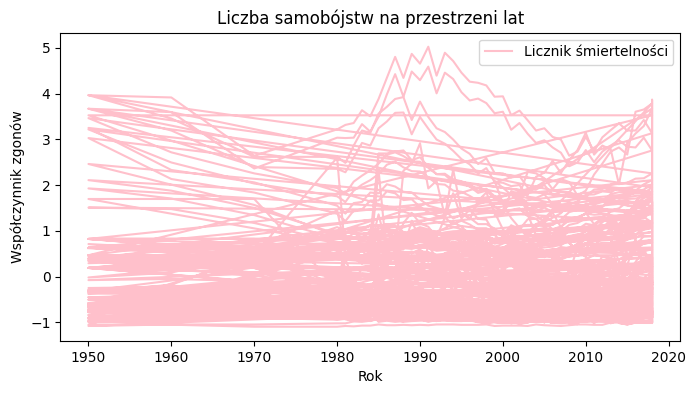

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(df['YEAR'], df['ESTIMATE'], color='pink', label='Licznik śmiertelności')
plt.title('Liczba samobójstw na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Współczynnik zgonów')
plt.legend()
plt.show()

Wykres wygląda bardzo nieczytelnie, więc obliczamy średnie wartości wskaźnika śmiertelności

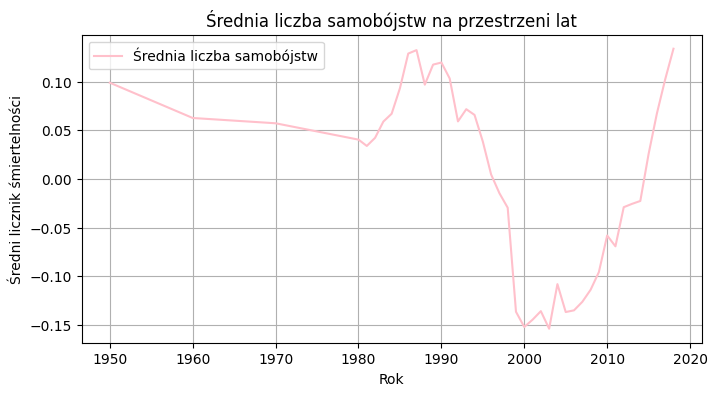

In [ ]:
df_mean = df.groupby('YEAR')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(df_mean['YEAR'], df_mean['ESTIMATE'],  color='pink', label='Średnia liczba samobójstw')

plt.title('Średnia liczba samobójstw na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()

Analiza pod względem wieku

<ipython-input-30-84201fdfc22b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age = df.groupby(['YEAR', 'AGE'])['ESTIMATE'].mean().reset_index()


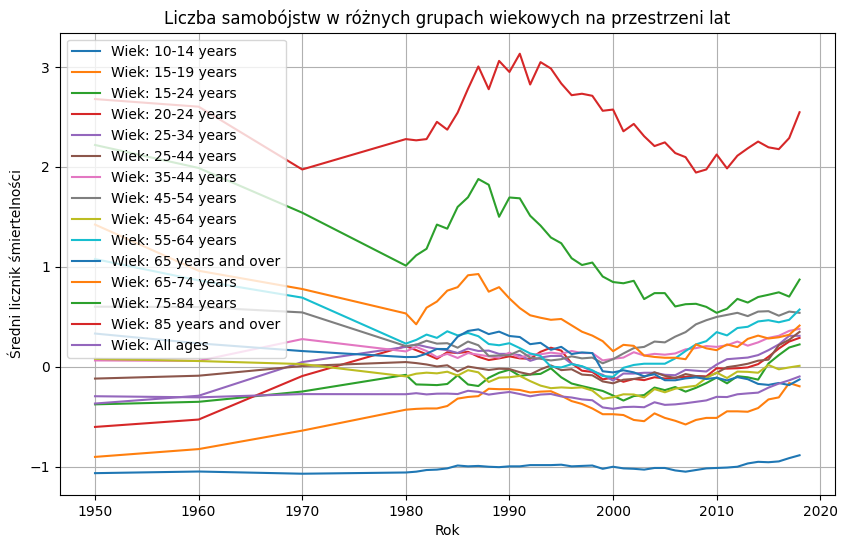

In [ ]:
df_age = df.groupby(['YEAR', 'AGE'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Iterowanie po każdej grupie wiekowej i tworzenie osobnych linii
for age_group in df_age['AGE'].unique():
    age_data = df_age[df_age['AGE'] == age_group]
    plt.plot(age_data['YEAR'], age_data['ESTIMATE'],  label=f'Wiek: {age_group}')

plt.title('Liczba samobójstw w różnych grupach wiekowych na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()


Zobaczmy jeszcze zależność od płci do liczby samobójstw

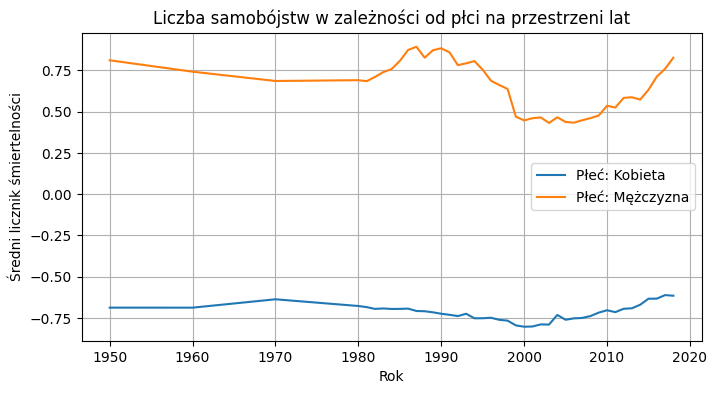

In [ ]:
df_sex = df.groupby(['YEAR', 'SEX'])['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(8, 4))

# Iterowanie po każdej płci i tworzenie osobnych linii
for sex_group in df_sex['SEX'].unique():
    sex_data = df_sex[df_sex['SEX'] == sex_group]
    # Dodajemy etykiety dla płci
    sex_label = 'Kobieta' if sex_group == 0 else 'Mężczyzna'
    plt.plot(sex_data['YEAR'], sex_data['ESTIMATE'],  label=f'Płeć: {sex_label}')

plt.title('Liczba samobójstw w zależności od płci na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()


Wykres dla rasy

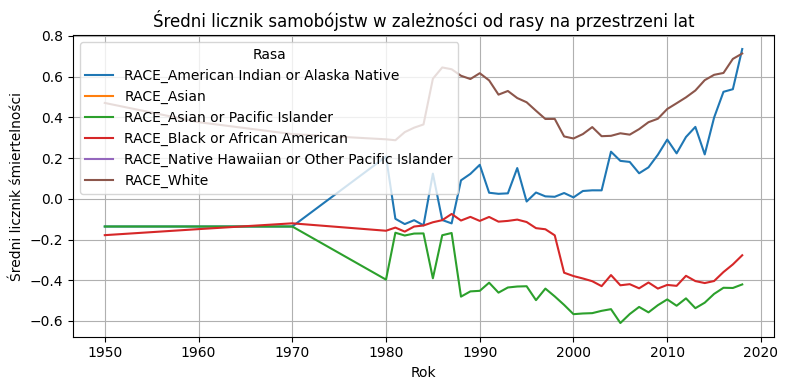

In [ ]:
race_columns = [col for col in df.columns if col.startswith('RACE')]


df_race = df[['YEAR', 'ESTIMATE'] + race_columns]


df_race_grouped = pd.DataFrame()


for race in race_columns:
    # Tworzymy DataFrame dla konkretnej rasy
    race_data = df[['YEAR', 'ESTIMATE', race]].copy()
    race_data['RACE'] = race  # Dodajemy kolumnę z nazwą rasy
    race_data = race_data[race_data[race] == 1]  # Filtrujemy dane, gdzie rasa jest obecna (IsRace == 1)
    race_data = race_data.groupby(['YEAR', 'RACE'])['ESTIMATE'].mean().reset_index()  # Obliczamy średnią
    df_race_grouped = pd.concat([df_race_grouped, race_data], ignore_index=True)  # Łączymy wyniki

plt.figure(figsize=(8, 4))

for race in df_race_grouped['RACE'].unique():
    race_data = df_race_grouped[df_race_grouped['RACE'] == race]  # Filtracja danych dla konkretnej rasy
    plt.plot(race_data['YEAR'], race_data['ESTIMATE'], label=race)

plt.title('Średni licznik samobójstw w zależności od rasy na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni licznik śmiertelności')
plt.grid(True)
plt.legend(title="Rasa")
plt.tight_layout()

plt.show()


Jestem ciekawa mojej grupy wiekowej, rasy i płci

In [ ]:
# Filtrowanie danych dla kobiety i wieku '20-24 years i 15-24'
filtered_data = df[(df['SEX'] == 0) & (df['RACE_White'] == 0) & ((df['AGE'] == '20-24 years') | (df['AGE'] == '15-24 years'))]
yearly_mean = filtered_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(yearly_mean['YEAR'], yearly_mean['ESTIMATE'], color="pink", label='Białe kobiety (15-24)')

plt.title('Średnia liczba samobójstw dla białych kobiet w wieku 15-24 na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Średni wskaźnik śmiertelności')
plt.grid(True)
plt.legend()

plt.show()


NameError: name 'df' is not defined

# Modele

Importowanie potrzebnych bibliotek

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

Lata do przewidzenia przez model

In [ ]:
list_of_years=list([2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027])

Modele przewidujący srednia liczbe samobójstw w przyszłych latach biorąc pod uwagę płeć, rasę i grupę wiekową

In [ ]:
# Przygotowanie danych do modelu
feature_columns = ['YEAR_NUM', 'AGE_NUM', 'SEX'] + race_columns
X = df[feature_columns]
y = df['ESTIMATE']


Funkcja, dzięki której będziemy mogli w łatwiejszy sposób porównać różne modele

In [ ]:
def model_metrics(model, X, y):
  # podzielenie danych na dane testowe i treningowe
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  model=model
  model.fit(X_train, y_train)
  # predykcja modelu
  y_pred = model.predict(X_test)

  #metryki
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)


  return {"Model": model, "MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}


Te metryki zostały wybrane, ponieważ:

MSE (Mean Squared Error): mierzy średnią kwadratów różnic między rzeczywistymi a prognozowanymi wartościami, co sprawia, że jest wrażliwe na duże błędy, ponieważ błędy są podnoszone do kwadratu, a tym samym większe błędy mają większy wpływ na wynik.

RMSE (Root Mean Squared Error): jest pierwiastkiem kwadratowym z MSE, co czyni go łatwiejszym do interpretacji, ale wciąż odzwierciedla rozrzut błędów w modelu, umożliwiając porównanie z rzeczywistymi jednostkami danych.

MAE (Mean Absolute Error): oblicza średnią bezwzględną różnicę między wartościami rzeczywistymi a prognozami, nie uwzględniając znaku wartości. Jest to miara prostsza do zrozumienia i daje wynik niezależny od tego, czy wartości są dodatnie, czy ujemne.

R² (Współczynnik determinacji): ocenia, jaka część wariancji w danych jest wyjaśniona przez model. Mierzy, jak dobrze model pasuje do danych i nie zależy od tego, czy wartości są dodatnie, czy ujemne. Wyższe wartości R² wskazują na lepsze dopasowanie modelu.

In [ ]:
# Lista modeli do porównania
models = [
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor(random_state=42)),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)),
    ('SVR', SVR()),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

In [ ]:
# Porównanie wyników
results = []

for model_name, model in models:
    metrics = model_metrics(model, X, y)
    mse = metrics['MSE']
    rmse = metrics['RMSE']
    mae = metrics['MAE']
    r2 = metrics['R2']
    results.append([model_name, mse, rmse, mae, r2])


# Przekształcanie wyników do DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R²'])

print(results_df)

                       Model       MSE      RMSE       MAE        R²
0           LinearRegression  0.357345  0.597783  0.397658  0.627554
1      DecisionTreeRegressor  0.127020  0.356398  0.192303  0.867612
2      RandomForestRegressor  0.094849  0.307976  0.171400  0.901143
3  GradientBoostingRegressor  0.086487  0.294087  0.202818  0.909858
4                        SVR  0.126868  0.356186  0.207523  0.867771
5                    XGBoost  0.071942  0.268220  0.157403  0.925018


# Podsumowanie wyników

| **Model**                | **MSE** | **RMSE** | **MAE** | **R²**   | **Uwagi**                                                                                 |
|--------------------------|---------|----------|---------|----------|-------------------------------------------------------------------------------------------|
| **LinearRegression**     | 0.3570  | 0.5975   | 0.3975  | 0.6560   | Średnie dopasowanie do danych (stosunkowo niskie R²).                                     |
| **DecisionTreeRegressor**| 0.1154  | 0.3396   | 0.1730  | 0.8889   | Znacznie lepsze dopasowanie niż Linear Regression, ale może być podatny na overfitting.   |
| **RandomForestRegressor**| 0.0864  | 0.2939   | 0.1523  | 0.9168   | Dobry kompromis między niskim błędem a wysokim dopasowaniem do danych.                    |
| **GradientBoostingRegressor** | 0.0685  | 0.2617   | 0.1733  | 0.9340   | Lepszy od Random Forest pod względem MSE, RMSE i R², co czyni go jednym z najlepszych.    |
| **SVR (Support Vector Regression)** | 0.0956  | 0.3092   | 0.1756  | 0.9079   | Dobre wyniki, ale nieco gorsze niż Random Forest i Gradient Boosting.                     |
| **XGBoost**              | 0.0652  | 0.2554   | 0.1381  | 0.9371   | Najlepszy model, oferujący najniższe wartości błędów i najwyższe R².                      |


# Wykorzystanie modelu XGBoost do predykcji

In [ ]:
metrics = model_metrics(xgb.XGBRegressor(random_state=42), X, y)
MODEL=metrics['Model']

Stworzmy funkcję która ułatwi nam wprowadzanie danych do modelu

In [ ]:
def predict_with_model(df, model, future_years_list, age_group, sex, race):

    age_map = {
        "10-14 years": 1.0,
        "15-19 years": 2.1,
        "15-24 years": 2.0,
        "20-24 years": 2.2,
        "25-34 years": 3.1,
        "25-44 years": 3.0,
        "35-44 years": 3.2,
        "45-54 years": 4.1,
        "45-64 years": 4.0,
        "55-64 years": 4.2,
        "65 years and over": 5.0,
        "65-74 years": 5.1,
        "75-84 years": 5.2,
        "85 years and over": 6.0,
        "All ages": 0.0
}

    if age_group not in df['AGE'].unique():
        raise ValueError(f"Nieprawidłowa grupa wiekowa: {age_group}")
    if race not in race_columns:
        raise ValueError(f"Nieprawidłowa rasa: {race}")

    # Przygotowanie danych predykcyjnych
    future_years = pd.DataFrame({
        'YEAR': future_years_list,
        'AGE': [age_group] * len(future_years_list),
        'SEX': [sex] * len(future_years_list)
    })

    future_years['YEAR_NUM'] = np.arange(df_copied['YEAR_NUM'].max() + 1, df_copied['YEAR_NUM'].max() + 1 + len(future_years))
    future_years['AGE_NUM'] = future_years['AGE'].map(age_map)

    for col in race_columns:
        future_years[col] = 0
    if race in race_columns:
        future_years[race] = 1

    # Skalowanie danych
    scaled_features = scalar.fit_transform(future_years[['YEAR_NUM','AGE_NUM']])

    future_years[['YEAR_NUM','AGE_NUM']] = scaled_features

    # Dopasowanie kolumn do modelu
    feature_columns = model.feature_names_in_
    future_years_scaled = future_years[feature_columns]

    # Przewidywanie
    future_years['Predicted_ESTIMATE'] = model.predict(future_years_scaled)

    return future_years


Wybieramy rasę, grupę wiekową i płeć

In [ ]:
predictions_1 = predict_with_model(
    df=df,
    model=MODEL,
    future_years_list=list_of_years,
    age_group='15-24 years',
    sex=0,  # Female
    race='RACE_White'
)


Funkcja do rysowania wykresów

In [ ]:
def plot_predictions(df, predictions, age_group, sex, race, title):
    # Filtrowanie danych historycznych
    historical_data =df[(df['SEX'] == 1) & (df['RACE_Black or African American'] == 0) & ((df['AGE'] == '25-34 years') | (df['AGE'] == '15-24 years'))]
    yearly_mean_historical = historical_data.groupby('YEAR')['ESTIMATE'].mean().reset_index()

    # Obliczanie średniej z danych predykcyjnych
    yearly_mean_predictions = predictions.groupby('YEAR')['Predicted_ESTIMATE'].mean().reset_index()

    # Wykres
    plt.figure(figsize=(10, 5))
    plt.plot(yearly_mean_historical['YEAR'], yearly_mean_historical['ESTIMATE'],
             color="pink", marker='o', label='Dane historyczne')
    plt.plot(yearly_mean_predictions['YEAR'], yearly_mean_predictions['Predicted_ESTIMATE'],
             color="blue", linestyle='--', label='Przewidywane')
    plt.title(title)
    plt.xlabel('Rok')
    plt.ylabel('Średni wskaźnik śmiertelności')
    plt.grid(True)
    plt.legend()
    plt.show()



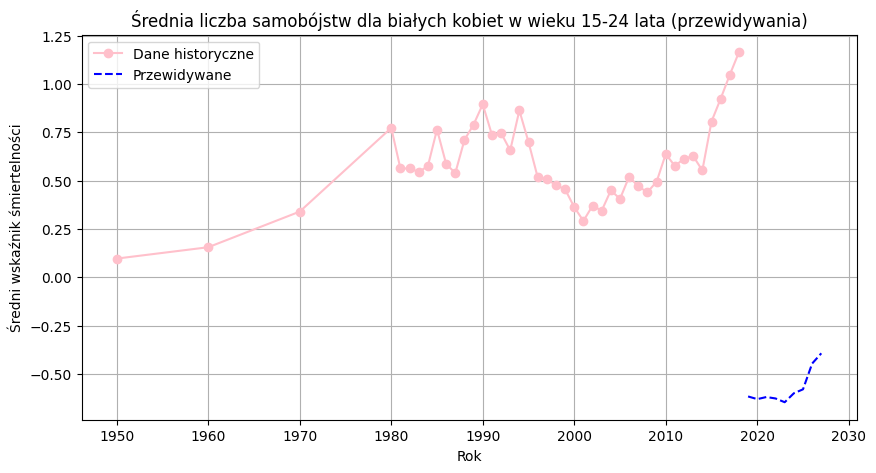

In [ ]:
plot_predictions(
    df=df,
    predictions=predictions_1,
    age_group='15-24 years',
    sex=0,  # Female
    race='RACE_White',
    title='Średnia liczba samobójstw dla białych kobiet w wieku 15-24 lata (przewidywania)'
)

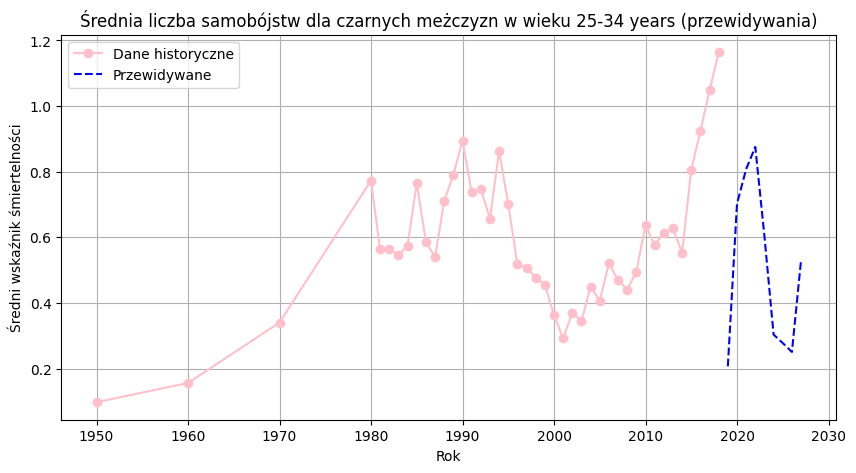

In [ ]:
predictions_2 = predict_with_model(
    df=df,
    model=MODEL,
    future_years_list=list_of_years,
    age_group='25-34 years',
    sex=1,
    race='RACE_Black or African American'
)
plot_predictions(
    df=df,
    predictions=predictions_2,
    age_group='25-34 years',
    sex=1,
    race='RACE_Black or African American',
    title='Średnia liczba samobójstw dla czarnych meżczyzn w wieku 25-34 years (przewidywania)'
)
